# Patil530Week12


# TERM PROJECT - Analyzing Gym Member Data and Predicting Calories Burned: A Data-Driven Approach to Optimize Fitness Outcomes

## Rohit Patil
## DSC-530 - Data Exploration and Analysis
## 30-FEB-2025

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

In [3]:
#loading data
gym_members_data = pd.read_csv('gym_members_exercise_tracking.csv')
gym_members_data.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
# Data Cleaning

# Fill missing values (if applicable)
gym_members_data.fillna({'Gender' : gym_members_data['Gender'].mode()[0]}, inplace=True)

# Remove duplicates
gym_members_data.drop_duplicates(inplace=True)

# Create BMI column if it's missing
if 'BMI' not in gym_members_data.columns:
    gym_members_data['BMI'] = gym_members_data['Weight (kg)'] / (gym_members_data['Height (m)'] ** 2)

In [5]:
#Check data type and null value
gym_members_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [6]:
gym_members_data.columns

Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')

In [7]:
variables = ['Age', 'Gender', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'BMI']


variable_descriptions = {
    'Age': 'Age of the gym member in years',
    'Gender': 'Gender of the gym member',
    'Session_Duration (hours)': 'Total time spent during a workout, measured in hours',
    'Calories_Burned': 'Number of calories burned during the workout session',
    'Workout_Type': 'Type of workout performed',
    'BMI': 'Body mass index of an individual',
}

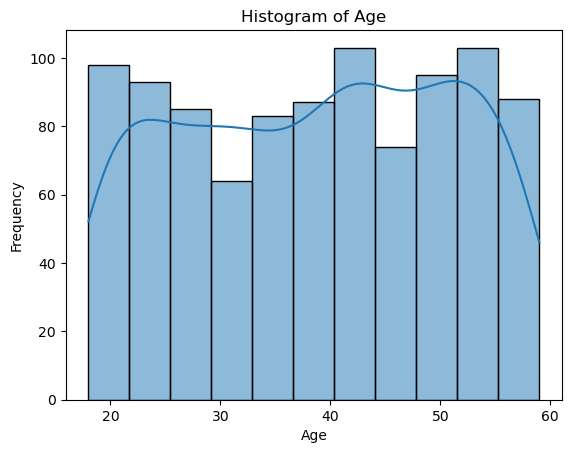

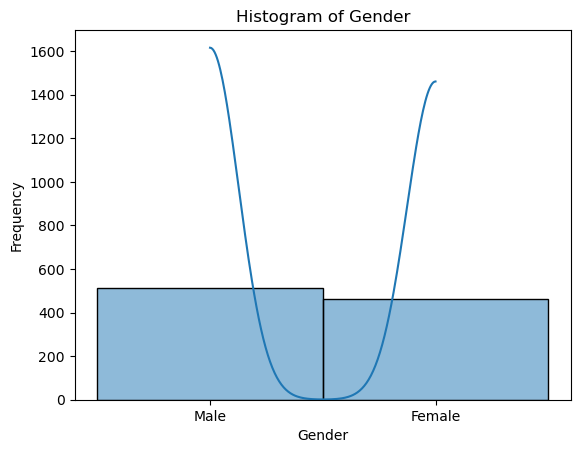

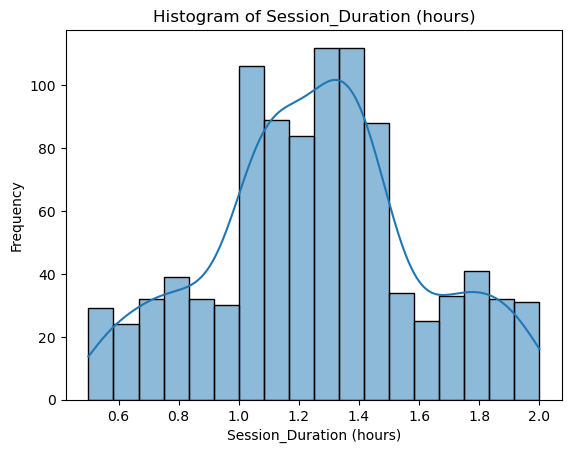

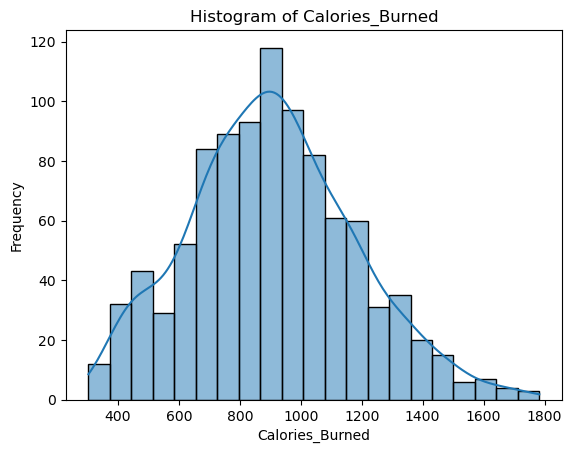

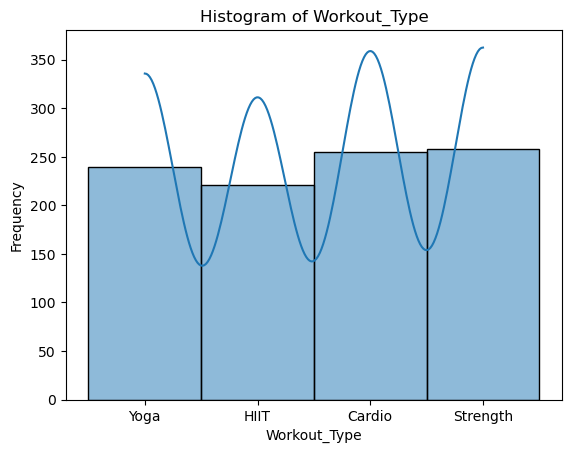

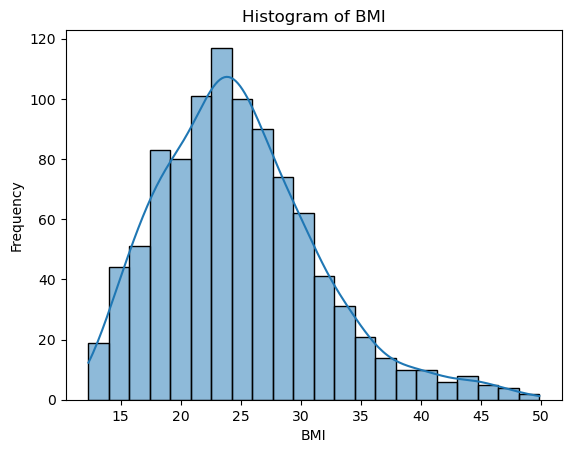

In [8]:
# Include a histogram of each of the 5 variables – in your summary and analysis, 

for variable in variables:
    plt.figure()
    sns.histplot(gym_members_data[variable], kde=True)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

In [9]:
# identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled
# Perform encoding on Gender and Workout_Type columns
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a new DataFrame to store the encoded values
gym_members_data_encoded = gym_members_data.copy()

# Apply label encoding and replace the original columns
gym_members_data_encoded['Gender'] = label_encoder.fit_transform(gym_members_data_encoded['Gender'])
gym_members_data_encoded['Workout_Type'] = label_encoder.fit_transform(gym_members_data_encoded['Workout_Type'])

variables = ['Age', 'Gender', 'Session_Duration (hours)', 'Calories_Burned', 'Workout_Type', 'BMI']

for variable in variables:
    z_scores = np.abs(stats.zscore(gym_members_data_encoded[variable].dropna()))
    outliers = gym_members_data_encoded[variable][z_scores > 3]
    print(f"Outliers in {variable}:")
    print(outliers)

Outliers in Age:
Series([], Name: Age, dtype: int64)
Outliers in Gender:
Series([], Name: Gender, dtype: int64)
Outliers in Session_Duration (hours):
Series([], Name: Session_Duration (hours), dtype: float64)
Outliers in Calories_Burned:
511    1725.0
712    1766.0
910    1783.0
Name: Calories_Burned, dtype: float64
Outliers in Workout_Type:
Series([], Name: Workout_Type, dtype: int64)
Outliers in BMI:
133    45.43
251    45.14
261    47.72
291    45.49
470    46.90
687    45.14
710    46.98
854    49.84
868    46.94
945    48.43
Name: BMI, dtype: float64


In [10]:
# Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails

descriptive_statistics = gym_members_data[variables].describe()
print("gym members data - Descriptive Statistics for selected variables:")
print(descriptive_statistics)


gym members data - Descriptive Statistics for selected variables:
              Age  Session_Duration (hours)  Calories_Burned         BMI
count  973.000000                973.000000       973.000000  973.000000
mean    38.683453                  1.256423       905.422405   24.912127
std     12.180928                  0.343033       272.641516    6.660879
min     18.000000                  0.500000       303.000000   12.320000
25%     28.000000                  1.040000       720.000000   20.110000
50%     40.000000                  1.260000       893.000000   24.160000
75%     49.000000                  1.460000      1076.000000   28.560000
max     59.000000                  2.000000      1783.000000   49.840000


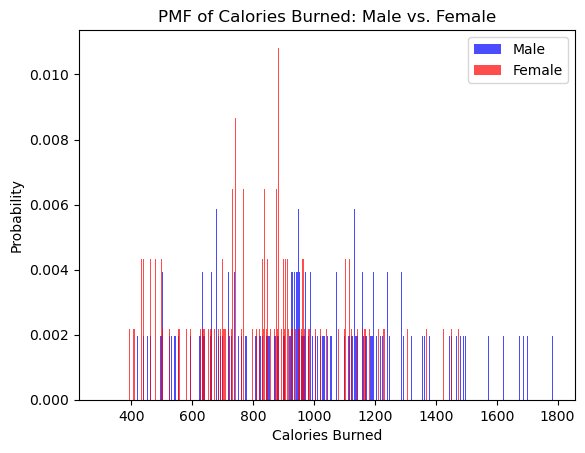

In [11]:
# Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. 
# Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. 
# Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, 
# but breaking the data out based on criteria we are exploring

# Scenario 1 - Calories Burned by Gender

from empiricaldist import Pmf

male_data = gym_members_data[gym_members_data['Gender'] == 'Male']['Calories_Burned']
female_data = gym_members_data[gym_members_data['Gender'] == 'Female']['Calories_Burned']

pmf_male = Pmf.from_seq(male_data)
pmf_female = Pmf.from_seq(female_data)

pmf_male.bar(label='Male', color='blue', alpha=0.7)
pmf_female.bar(label='Female', color='red', alpha=0.7)

plt.xlabel('Calories Burned')
plt.ylabel('Probability')
plt.title('PMF of Calories Burned: Male vs. Female')
plt.legend()
plt.show()

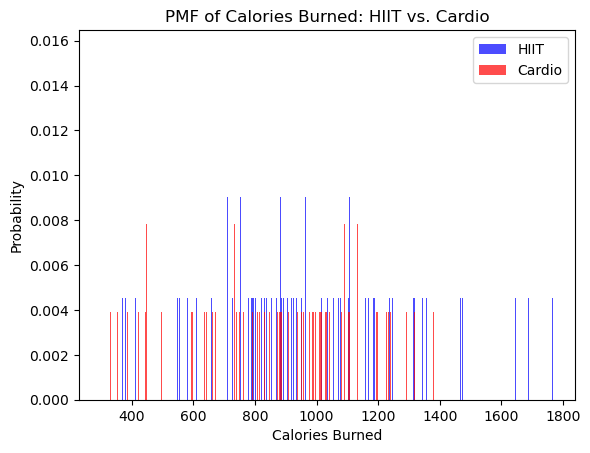

In [12]:
# Scenario 2 - Calories Burned by Workout Type

hiit_data = gym_members_data[gym_members_data['Workout_Type'] == 'HIIT']['Calories_Burned']
cardio_data = gym_members_data[gym_members_data['Workout_Type'] == 'Cardio']['Calories_Burned']

pmf_hiit = Pmf.from_seq(hiit_data)
pmf_cardio = Pmf.from_seq(cardio_data)

pmf_hiit.bar(label='HIIT', color='blue', alpha=0.7)
pmf_cardio.bar(label='Cardio', color='red', alpha=0.7)

plt.xlabel('Calories Burned')
plt.ylabel('Probability')
plt.title('PMF of Calories Burned: HIIT vs. Cardio')
plt.legend()
plt.show()

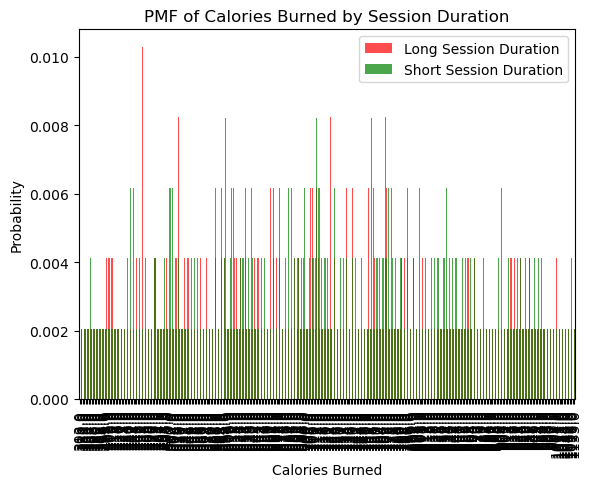

In [13]:
# Scenario 3 - Calories burned by Session Duration

long_session = gym_members_data[gym_members_data['Session_Duration (hours)'] > gym_members_data['Session_Duration (hours)'].median()]['Calories_Burned']
short_session = gym_members_data[gym_members_data['Session_Duration (hours)'] <= gym_members_data['Session_Duration (hours)'].median()]['Calories_Burned']

pmf_long_session = long_session.value_counts(normalize=True).sort_index()
pmf_short_session = short_session.value_counts(normalize=True).sort_index()

plt.figure()
pmf_long_session.plot(kind='bar', color = 'red', alpha=0.7, label='Long Session Duration')
pmf_short_session.plot(kind='bar', color = 'green', alpha=0.7, label='Short Session Duration')
plt.title('PMF of Calories Burned by Session Duration')
plt.xlabel('Calories Burned')
plt.ylabel('Probability')
plt.legend()
plt.show()

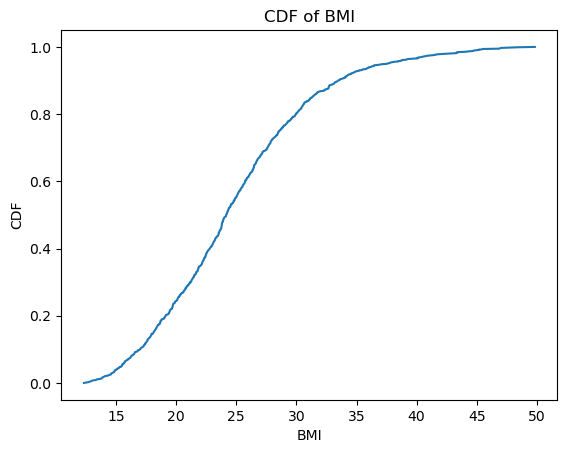

In [14]:
# Create 1 CDF with one of your variables, using page 41-44 as your guide, 
# what does this tell you about your variable and how does it address the question you are trying to answer

bmi_cdf = np.sort(gym_members_data['BMI'].dropna())
yvals = np.arange(len(bmi_cdf))/float(len(bmi_cdf)-1)

plt.figure()
plt.plot(bmi_cdf, yvals)
plt.title('CDF of BMI')
plt.xlabel('BMI')
plt.ylabel('CDF')
plt.show()

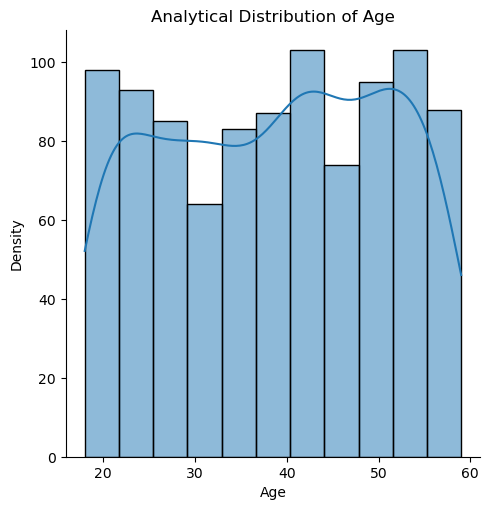

In [15]:
# Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen

sns.displot(gym_members_data['Age'], kde=True)
plt.title('Analytical Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

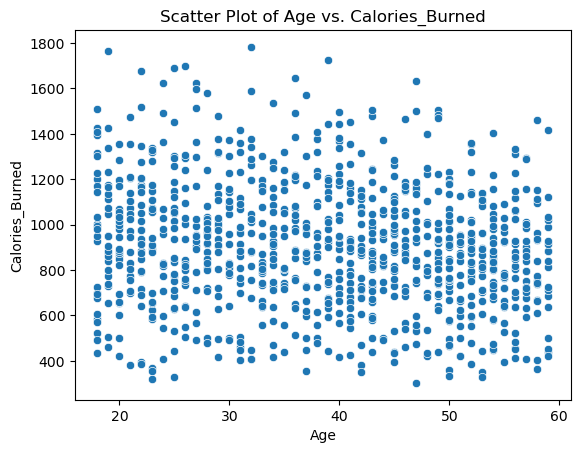

Covariance between Age and Calories Burned: -513.69
Pearson’s Correlation between Age and Calories Burned: -0.15


In [16]:
# Create two scatter plots comparing two variables and provide your analysis on correlation and causation. 
# Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis.

# Plot 1 - Age vs Calories_Burned
sns.scatterplot(x='Age', y='Calories_Burned', data=gym_members_data)
plt.title('Scatter Plot of Age vs. Calories_Burned')
plt.xlabel('Age')
plt.ylabel('Calories_Burned')
plt.show()

# Calculate covariance 
covariance = gym_members_data['Age'].cov(gym_members_data['Calories_Burned'])
print(f"Covariance between Age and Calories Burned: {covariance:.2f}")

# Calculate Pearson’s correlation
corr, _ = stats.pearsonr(gym_members_data['Age'], gym_members_data['Calories_Burned'])
print(f"Pearson’s Correlation between Age and Calories Burned: {corr:.2f}")

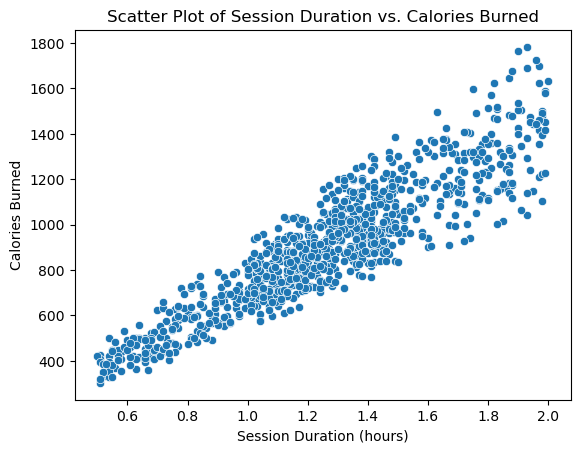

Covariance between Session_Duration (hours) and Calories Burned: 84.93
Pearson’s Correlation between Session_Duration (hours) and Calories Burned: 0.91


In [17]:
# Plot 2 - Session_Duration (hours) vs Calories_Burned

sns.scatterplot(x='Session_Duration (hours)', y='Calories_Burned', data=gym_members_data)
plt.title('Scatter Plot of Session Duration vs. Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')
plt.show()

# Calculate covariance 
covariance = gym_members_data['Session_Duration (hours)'].cov(gym_members_data['Calories_Burned'])
print(f"Covariance between Session_Duration (hours) and Calories Burned: {covariance:.2f}")

# Calculate Pearson’s correlation
corr, _ = stats.pearsonr(gym_members_data['Session_Duration (hours)'], gym_members_data['Calories_Burned'])
print(f"Pearson’s Correlation between Session_Duration (hours) and Calories Burned: {corr:.2f}")

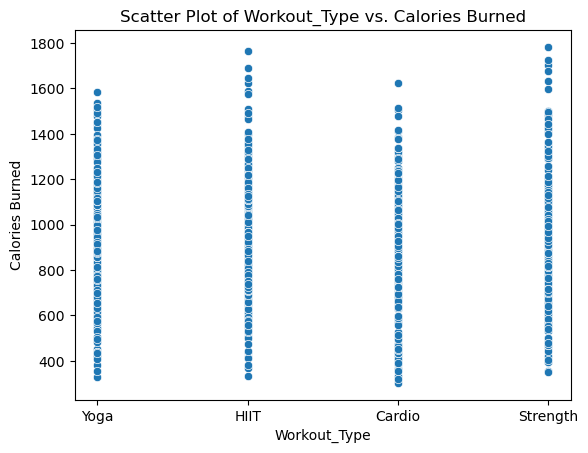

Covariance between Workout_Type and Calories Burned: 5.79
Pearson’s Correlation between Workout_Type and Calories Burned: 0.02


In [18]:
# Plot 3 - Workout_Type vs Calories_Burned

sns.scatterplot(x='Workout_Type', y='Calories_Burned', data=gym_members_data)
plt.title('Scatter Plot of Workout_Type vs. Calories Burned')
plt.xlabel('Workout_Type')
plt.ylabel('Calories Burned')
plt.show()

# Calculate covariance 
covariance = gym_members_data_encoded['Workout_Type'].cov(gym_members_data_encoded['Calories_Burned'])
print(f"Covariance between Workout_Type and Calories Burned: {covariance:.2f}")

# Calculate Pearson’s correlation
corr, _ = stats.pearsonr(gym_members_data_encoded['Workout_Type'], gym_members_data_encoded['Calories_Burned'])
print(f"Pearson’s Correlation between Workout_Type and Calories Burned: {corr:.2f}")

In [19]:
# Conduct a test on your hypothesis using one of the methods covered

# Separate data for male and female members
male_calories = gym_members_data[gym_members_data['Gender'] == 'Male']['Calories_Burned']
female_calories = gym_members_data[gym_members_data['Gender'] == 'Female']['Calories_Burned']

# Perform the two-sample t-test
t_stat, p_value = stats.ttest_ind(male_calories, female_calories, equal_var=True)
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.9f}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average calories burned between male and female gym members.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average calories burned between male and female gym members.")

t-statistic: 4.7485
p-value: 0.000002358
Reject the null hypothesis: There is a significant difference in average calories burned between male and female gym members.


In [20]:
# For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables

X = gym_members_data[['Age', 'Session_Duration (hours)', 'BMI']].dropna()
y = gym_members_data['Calories_Burned'].dropna()
X = sm.add_constant(X)  # Add constant term for intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Calories_Burned   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     1794.
Date:                Fri, 28 Feb 2025   Prob (F-statistic):               0.00
Time:                        14:10:54   Log-Likelihood:                -5922.1
No. Observations:                 973   AIC:                         1.185e+04
Df Residuals:                     969   BIC:                         1.187e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   